In [2]:
import time

import numpy as np
import pylab as pl

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

/Users/ethanchatfield/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [4]:
df = pd.read_csv("Desktop/carnivore-spotter-export3.csv")

In [5]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [6]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [7]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [8]:
df['Month']=df.Time_Seen.dt.month

In [9]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [10]:
coyo_sum = summer[summer.Species=='Coyote']
coyo_fall = fall[fall.Species=='Coyote']
coyo_winter = winter[winter.Species=='Coyote']
coyo_spring = spring[spring.Species=='Coyote']

In [11]:
#black bear
b_sum = summer[summer.Species=='Black Bear']
b_fall = fall[fall.Species=='Black Bear']
b_winter = winter[winter.Species=='Black Bear']
b_spring = spring[spring.Species=='Black Bear']

In [12]:
#raccoon
r_sum = summer[summer.Species=='Raccoon']
r_fall = fall[fall.Species=='Raccoon']
r_winter = winter[winter.Species=='Raccoon']
r_spring = spring[spring.Species=='Raccoon']

In [13]:
#coyote,black bear, raccoon
cbr_summer = summer[(summer.Species=='Coyote')|(summer.Species=='Black Bear')|(summer.Species=='Raccoon')]
cbr_fall = fall[(fall.Species=='Coyote')|(fall.Species=='Black Bear')|(fall.Species=='Raccoon')]
cbr_winter = winter[(winter.Species=='Coyote')|(winter.Species=='Black Bear')|(winter.Species=='Raccoon')]
cbr_spring = spring[(spring.Species=='Coyote')|(spring.Species=='Black Bear')|(spring.Species=='Raccoon')]

In [14]:
summer = summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
fall = fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
winter = winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
spring = spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [15]:
coyo_sum = coyo_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_fall = coyo_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_winter = coyo_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_spring = coyo_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [16]:
b_sum=b_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_fall=b_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_winter=b_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_spring=b_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [17]:
r_sum=r_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_fall=r_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_winter=r_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_spring=r_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [18]:
cbr_summer = cbr_summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_fall = cbr_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_winter = cbr_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_spring = cbr_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [19]:
#handle missing data if there is any
summer.fillna(method='bfill',inplace=True)
fall.fillna(method='bfill',inplace=True)
winter.fillna(method='bfill',inplace=True)
spring.fillna(method='bfill',inplace=True)

coyo_sum.fillna(method='bfill',inplace=True)
coyo_fall.fillna(method='bfill',inplace=True)
coyo_winter.fillna(method='bfill',inplace=True)
coyo_spring.fillna(method='bfill',inplace=True)

b_sum.fillna(method='bfill',inplace=True)
b_fall.fillna(method='bfill',inplace=True)
b_winter.fillna(method='bfill',inplace=True) #0sample
b_spring.fillna(method='bfill',inplace=True)

r_sum.fillna(method='bfill',inplace=True)
r_fall.fillna(method='bfill',inplace=True)
r_winter.fillna(method='bfill',inplace=True)
r_spring.fillna(method='bfill',inplace=True)

cbr_summer.fillna(method='bfill',inplace=True)
cbr_fall.fillna(method='bfill',inplace=True)
cbr_winter.fillna(method='bfill',inplace=True)
cbr_spring.fillna(method='bfill',inplace=True)

In [20]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [21]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [22]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum)
b_fall_scaled=StandardScaler().fit_transform(b_fall)
#b_winter_scaled=StandardScaler().fit_transform(b_winter)
b_spring_scaled=StandardScaler().fit_transform(b_spring)

In [23]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
r_spring_scaled=StandardScaler().fit_transform(r_spring)

In [24]:
#cbr
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

In [25]:
summer_kmeans = KMeans(n_clusters=5)
summer_kmeans.fit(summer_scaled)

KMeans(n_clusters=5)

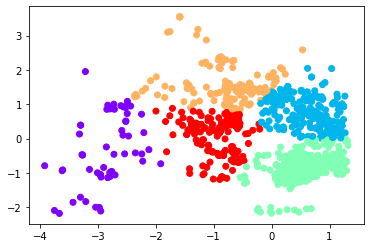

In [26]:
plt.scatter(summer_scaled[:,0],summer_scaled[:,1], c=summer_kmeans.labels_, cmap='rainbow')

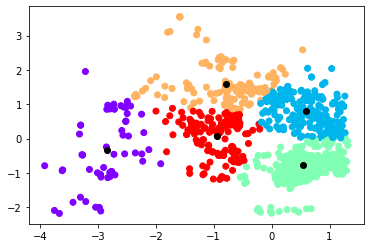

In [27]:
plt.scatter(summer_scaled[:,0], summer_scaled[:,1], c=summer_kmeans.labels_, cmap='rainbow')
plt.scatter(summer_kmeans.cluster_centers_[:,0] ,summer_kmeans.cluster_centers_[:,1], color='black')

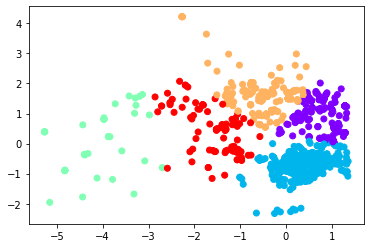

In [28]:
fall_kmeans = KMeans(n_clusters=5)
fall_kmeans.fit(fall_scaled)
plt.scatter(fall_scaled[:,0],fall_scaled[:,1], c=fall_kmeans.labels_, cmap='rainbow')

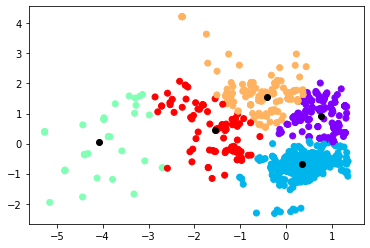

In [29]:
plt.scatter(fall_scaled[:,0], fall_scaled[:,1], c=fall_kmeans.labels_, cmap='rainbow')
plt.scatter(fall_kmeans.cluster_centers_[:,0] ,fall_kmeans.cluster_centers_[:,1], color='black')

In [31]:
winter_kmeans = KMeans(n_clusters=5)
winter_kmeans.fit(winter_scaled)

KMeans(n_clusters=5)

In [32]:
spring_kmeans = KMeans(n_clusters=5)
spring_kmeans.fit(spring_scaled)

KMeans(n_clusters=5)

In [33]:
summer_labels = summer_kmeans.labels_
realClusterNum_summer = len(set(summer_labels))-(1 if -1 in summer_labels else 0)
clusterNum_summer = len(set(summer_labels))
print("realclusterNum_summer",realClusterNum_summer)
print("clusterNum_summer",clusterNum_summer)

realclusterNum_summer 5
clusterNum_summer 5


In [34]:
fall_labels = fall_kmeans.labels_
realClusterNum_fall = len(set(fall_labels))-(1 if -1 in fall_labels else 0)
clusterNum_fall = len(set(fall_labels))
print("realclusterNum_fall",realClusterNum_fall)
print("clusterNum_fall",clusterNum_fall)

realclusterNum_fall 5
clusterNum_fall 5


In [35]:
winter_labels = winter_kmeans.labels_
realClusterNum_winter = len(set(winter_labels))-(1 if -1 in winter_labels else 0)
clusterNum_winter = len(set(winter_labels))
print("realclusterNum_winter",realClusterNum_winter)
print("clusterNum_winter",clusterNum_winter)

realclusterNum_winter 5
clusterNum_winter 5


In [36]:
spring_labels = spring_kmeans.labels_
realClusterNum_spring = len(set(spring_labels))-(1 if -1 in spring_labels else 0)
clusterNum_spring = len(set(spring_labels))
print("realclusterNum_spring",realClusterNum_spring)
print("clusterNum_spring",clusterNum_spring)

realclusterNum_spring 5
clusterNum_spring 5


In [37]:
y_pred_summer = summer_kmeans.fit_predict(summer_scaled)
y_pred_fall = fall_kmeans.fit_predict(fall_scaled)
y_pred_winter = winter_kmeans.fit_predict(winter_scaled)
y_pred_spring = spring_kmeans.fit_predict(spring_scaled)

Text(0.5, 1.0, 'Winter')

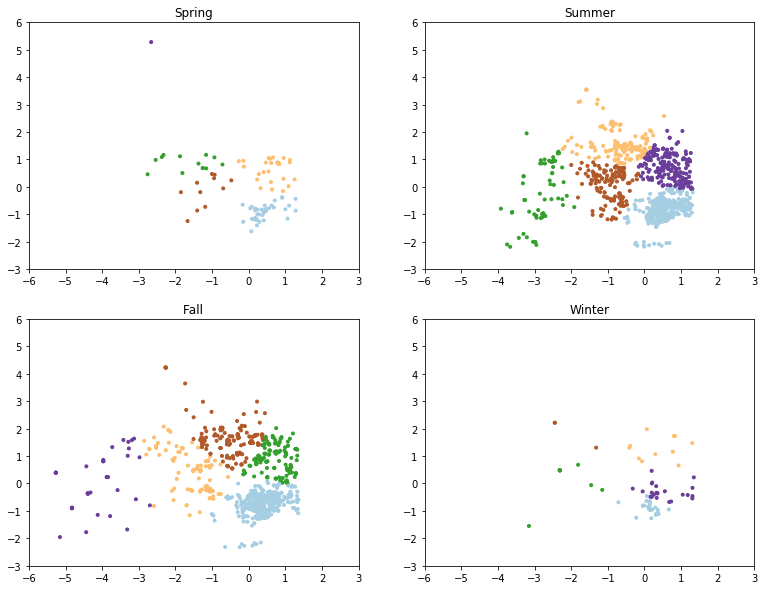

In [38]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=y_pred_spring,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer_scaled[:,0],summer_scaled[:,1],c=y_pred_summer,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=y_pred_fall,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=y_pred_winter,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')

In [39]:
#all species
summer_clus = [summer_scaled[summer_labels == i] for i in range(realClusterNum_summer)]
print(summer_clus[0])

[[-2.4937115   0.72633938]
 [-3.27561103 -0.47221001]
 [-3.60753156 -0.91270993]
 [-2.56735061  0.09876546]
 [-2.95553792 -1.05345788]
 [-2.51680833  0.51155122]
 [-2.51961139  0.90369248]
 [-2.53799207 -0.44655063]
 [-2.35306464 -0.41858756]
 [-3.26492683 -0.47873026]
 [-2.84579372  0.85103218]
 [-3.42980618 -1.8568603 ]
 [-2.90034028 -0.84265894]
 [-3.2647707  -0.47872749]
 [-2.85365942 -0.24480047]
 [-3.29829833  0.38908828]
 [-2.95498809 -1.05987689]
 [-3.29829833  0.38908828]
 [-2.70475785 -1.05936516]
 [-2.22569241 -0.65953955]
 [-2.76103792 -0.97166425]
 [-2.11965715 -0.32403504]
 [-3.14569507 -0.89937077]
 [-3.30132308 -1.70868086]
 [-1.91510381 -0.73431999]
 [-2.24616072  0.70898566]
 [-3.21572884  1.95052044]
 [-3.03872165 -1.99904253]
 [-2.95105833 -2.11044363]
 [-2.24166993 -0.44910305]
 [-2.206617    0.17238948]
 [-2.72278174 -0.45840427]
 [-3.31776229  0.13113763]
 [-3.91879977 -0.79208528]
 [-2.76554407 -0.95789392]
 [-2.82872494 -1.13917294]
 [-3.61727811 -0.93658942]
 

In [51]:
coyo_summer_kmeans = KMeans(n_clusters=5)
coyo_summer_kmeans.fit(coyo_summer_scaled)
coyo_fall_kmeans = KMeans(n_clusters=5)
coyo_fall_kmeans.fit(coyo_fall_scaled)
coyo_winter_kmeans = KMeans(n_clusters=5)
coyo_winter_kmeans.fit(coyo_winter_scaled)
coyo_spring_kmeans = KMeans(n_clusters=5)
coyo_spring_kmeans.fit(coyo_spring_scaled)

KMeans(n_clusters=5)

(-3, 6)

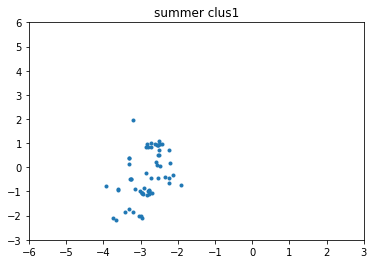

In [52]:
summer_clus1 = summer_clus[0]#[summer_scaled[summer_labels==0]]
summer_clus2 = summer_clus[1]#[summer_scaled[summer_labels==1]]
summer_clus3 = summer_clus[2]#[summer_scaled[summer_labels==2]]
summer_clus4 = summer_clus[3]
summer_clus5 = summer_clus[4]
#summer_clus6 = summer_clus[5]
#summer_clus7 = summer_clus[6]
#summer_clus8 = summer_clus[7]
#summer_clus9 = summer_clus[8]
#summer_clus10 = summer_clus[9]
#summer_clus11 = summer_clus[10]
#print(summer_clus1)
summer_clus1 = np.array(list(summer_clus1))
summer_clus2 = np.array(list(summer_clus2))
summer_clus3 = np.array(list(summer_clus3))
summer_clus4 = np.array(list(summer_clus4))
summer_clus5 = np.array(list(summer_clus5))
#summer_clus6 = np.array(list(summer_clus6))
#summer_clus7 = np.array(list(summer_clus7))
#summer_clus8 = np.array(list(summer_clus8))
#summer_clus9 = np.array(list(summer_clus9))
#summer_clus10 = np.array(list(summer_clus10))
#summer_clus11 = np.array(list(summer_clus11))

xs1 = summer_clus1.transpose()[0]
ys1 = summer_clus1.transpose()[1]

xs2 = summer_clus2.transpose()[0]
ys2 = summer_clus2.transpose()[1]

xs3 = summer_clus3.transpose()[0]
ys3 = summer_clus3.transpose()[1]

xs4 = summer_clus4.transpose()[0]
ys4 = summer_clus4.transpose()[1]

xs5 = summer_clus5.transpose()[0]
ys5 = summer_clus5.transpose()[1]

#xs6 = summer_clus6.transpose()[0]
#ys6 = summer_clus6.transpose()[1]

#xs7 = summer_clus7.transpose()[0]
#ys7 = summer_clus7.transpose()[1]

#xs8 = summer_clus8.transpose()[0]
#ys8 = summer_clus8.transpose()[1]

#xs9 = summer_clus9.transpose()[0]
#ys9 = summer_clus9.transpose()[1]

#xs10 = summer_clus10.transpose()[0]
#ys10 = summer_clus10.transpose()[1]

#xs11 = summer_clus11.transpose()[0]
#ys11 = summer_clus11.transpose()[1]

plt.scatter(xs1,ys1,marker='.')
plt.title('summer clus1')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3, 6)

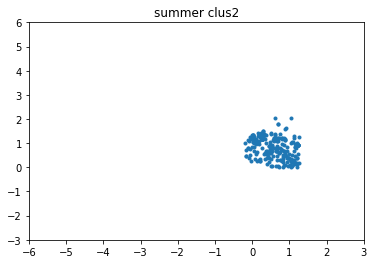

In [53]:
plt.scatter(xs2,ys2,marker='.')
plt.title('summer clus2')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3, 6)

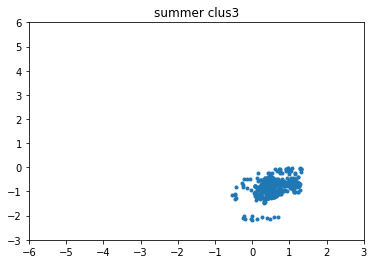

In [54]:
plt.scatter(xs3,ys3,marker='.')
plt.title('summer clus3')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3, 6)

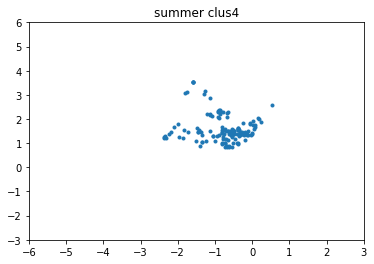

In [55]:
plt.scatter(xs4,ys4,marker='.')
plt.title('summer clus4')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3, 6)

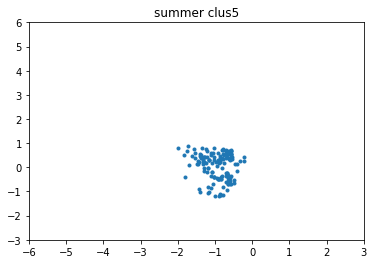

In [56]:
plt.scatter(xs5,ys5,marker='.')
plt.title('summer clus5')
plt.xlim(-6,3)
plt.ylim(-3,6)

In [61]:
y_pred_summer_coyo = coyo_summer_kmeans.fit_predict(coyo_summer_scaled)
y_pred_fall_coyo = coyo_fall_kmeans.fit_predict(coyo_fall_scaled)
y_pred_winter_coyo = coyo_winter_kmeans.fit_predict(coyo_winter_scaled)
y_pred_spring_coyo = coyo_spring_kmeans.fit_predict(coyo_spring_scaled)

In [62]:
coyo_summer_labels = coyo_summer_kmeans.labels_
realClusterNum_summer_coyo = len(set(coyo_summer_labels))-(1 if -1 in coyo_summer_labels else 0)
clusterNum_summer_coyo = len(set(coyo_summer_labels))
print("realclusterNum_summer_coyo",realClusterNum_summer_coyo)
print("clusterNum_summer_coyo",clusterNum_summer_coyo)

coyo_fall_labels = coyo_fall_kmeans.labels_
realClusterNum_fall_coyo = len(set(coyo_fall_labels))-(1 if -1 in coyo_fall_labels else 0)
clusterNum_fall_coyo = len(set(coyo_fall_labels))
print("realclusterNum_fall_coyo",realClusterNum_fall_coyo)
print("clusterNum_fall_coyo",clusterNum_fall_coyo)

coyo_winter_labels = coyo_winter_kmeans.labels_
realClusterNum_winter_coyo = len(set(coyo_winter_labels))-(1 if -1 in coyo_winter_labels else 0)
clusterNum_winter_coyo = len(set(coyo_winter_labels))
print("realclusterNum_winter_coyo",realClusterNum_winter_coyo)
print("clusterNum_winter_coyo",clusterNum_winter_coyo)

coyo_spring_labels = coyo_spring_kmeans.labels_
realClusterNum_spring_coyo = len(set(coyo_spring_labels))-(1 if -1 in coyo_spring_labels else 0)
clusterNum_spring_coyo = len(set(coyo_spring_labels))
print("realclusterNum_spring",realClusterNum_spring_coyo)
print("clusterNum_spring",clusterNum_spring_coyo)

realclusterNum_summer_coyo 5
clusterNum_summer_coyo 5
realclusterNum_fall_coyo 5
clusterNum_fall_coyo 5
realclusterNum_winter_coyo 5
clusterNum_winter_coyo 5
realclusterNum_spring 5
clusterNum_spring 5


Text(0.5, 1.0, 'Winter coyote')

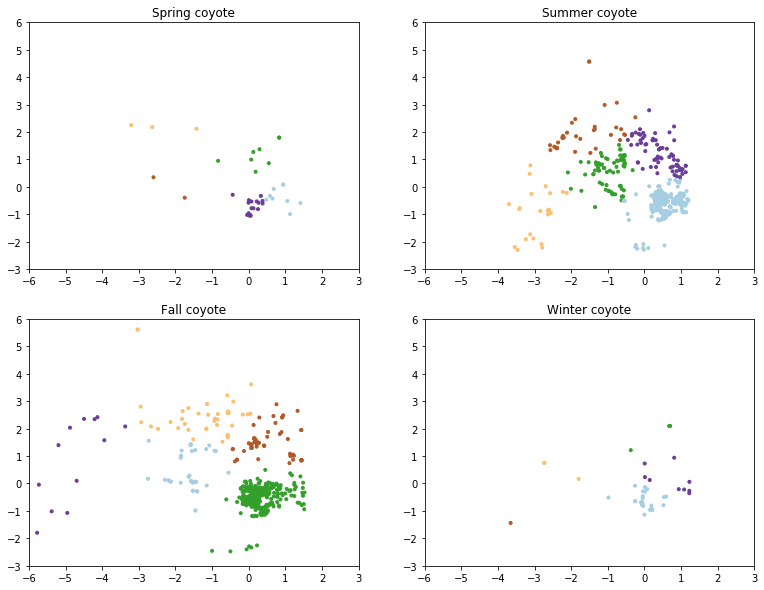

In [63]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=y_pred_spring_coyo,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=y_pred_summer_coyo,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=y_pred_fall_coyo,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=y_pred_winter_coyo,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote')

In [65]:
kmeans_summer_b = KMeans(n_clusters=5)
kmeans_summer_b.fit(b_summer_scaled)
kmeans_fall_b = KMeans(n_clusters=5)
kmeans_fall_b.fit(b_fall_scaled)
kmeans_spring_b = KMeans(n_clusters=5)
kmeans_spring_b.fit(b_spring_scaled)

KMeans(n_clusters=5)

In [67]:
#black bear
b_summer_labels = kmeans_summer_b.labels_
realClusterNum_summer_b = len(set(b_summer_labels))-(1 if -1 in b_summer_labels else 0)
clusterNum_summer_b = len(set(b_summer_labels))
print("realclusterNum_summer_b",realClusterNum_summer_b)
print("clusterNum_summer_b",clusterNum_summer_b)

b_fall_labels = kmeans_fall_b.labels_
realClusterNum_fall_b = len(set(b_fall_labels))-(1 if -1 in b_fall_labels else 0)
clusterNum_fall_b = len(set(b_fall_labels))
print("realclusterNum_fall_b",realClusterNum_fall_b)
print("clusterNum_fall_b",clusterNum_fall_b)

b_spring_labels = kmeans_spring_b.labels_
realClusterNum_spring_b = len(set(b_spring_labels))-(1 if -1 in b_spring_labels else 0)
clusterNum_spring_b = len(set(b_spring_labels))
print("realclusterNum_spring_b",realClusterNum_spring_b)
print("clusterNum_spring_b",clusterNum_spring_b)

realclusterNum_summer_b 5
clusterNum_summer_b 5
realclusterNum_fall_b 5
clusterNum_fall_b 5
realclusterNum_spring_b 5
clusterNum_spring_b 5


In [69]:
y_pred_summer_b = kmeans_summer_b.fit_predict(b_summer_scaled)
y_pred_fall_b= kmeans_fall_b.fit_predict(b_fall_scaled)
y_pred_spring_b = kmeans_spring_b.fit_predict(b_spring_scaled)

Text(0.5, 1.0, 'Winter black bear')

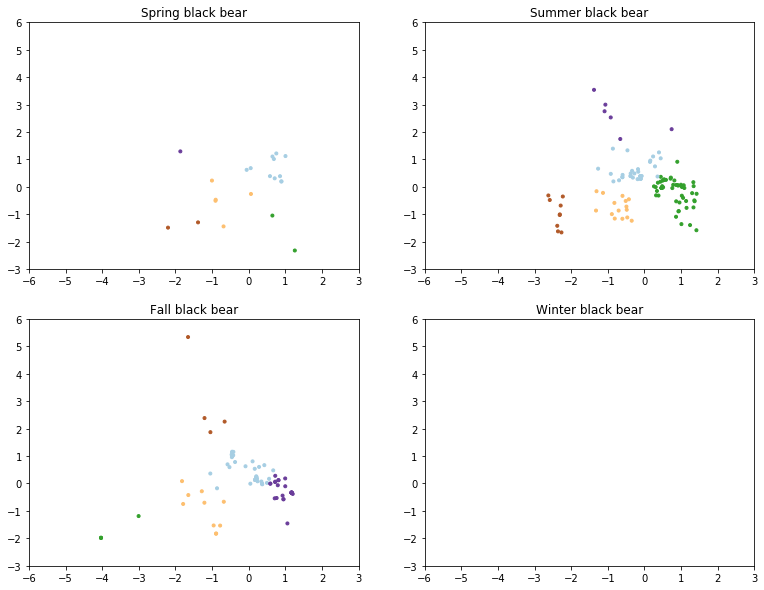

In [70]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=y_pred_spring_b,cmap='Paired',marker='.')
axs[0,0].set_title('Spring black bear')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=y_pred_summer_b,cmap='Paired',marker='.')
axs[0,1].set_title('Summer black bear')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=y_pred_fall_b,cmap='Paired',marker='.')
axs[1,0].set_title('Fall black bear')
axs[1,1].set_title('Winter black bear')

In [95]:
kmeans_summer_r = KMeans(n_clusters=5)
kmeans_summer_r.fit(r_summer_scaled)
kmeans_fall_r = KMeans(n_clusters=5)
kmeans_fall_r.fit(r_fall_scaled)
kmeans_winter_r = KMeans(n_clusters=1)
kmeans_winter_r.fit(r_fall_scaled)
kmeans_spring_r = KMeans(n_clusters=1)
kmeans_spring_r.fit(r_spring_scaled)

KMeans(n_clusters=1)

In [96]:
#raccoon
r_summer_labels = kmeans_summer_r.labels_
realClusterNum_summer_r = len(set(r_summer_labels))-(1 if -1 in r_summer_labels else 0)
clusterNum_summer_r = len(set(r_summer_labels))
print("realclusterNum_summer_r",realClusterNum_summer_r)
print("clusterNum_summer_r",clusterNum_summer_r)

r_fall_labels = kmeans_fall_r.labels_
realClusterNum_fall_r = len(set(r_fall_labels))-(1 if -1 in r_fall_labels else 0)
clusterNum_fall_r = len(set(r_fall_labels))
print("realclusterNum_fall_r",realClusterNum_fall_r)
print("clusterNum_fall_r",clusterNum_fall_r)

r_winter_labels = kmeans_winter_r.labels_
realClusterNum_winter_r = len(set(r_winter_labels))-(1 if -1 in r_winter_labels else 0)
clusterNum_winter_r = len(set(r_winter_labels))
print("realclusterNum_winter_r",realClusterNum_winter_r)
print("clusterNum_winter_r",clusterNum_winter_r)

r_spring_labels = kmeans_spring_r.labels_
realClusterNum_spring_r = len(set(r_spring_labels))-(1 if -1 in r_spring_labels else 0)
clusterNum_spring_r = len(set(r_spring_labels))
print("realclusterNum_spring_r",realClusterNum_spring_r)
print("clusterNum_spring_r",clusterNum_spring_r)

realclusterNum_summer_r 5
clusterNum_summer_r 5
realclusterNum_fall_r 5
clusterNum_fall_r 5
realclusterNum_winter_r 1
clusterNum_winter_r 1
realclusterNum_spring_r 1
clusterNum_spring_r 1


In [97]:
y_pred_summer_r = kmeans_summer_r.fit_predict(r_summer_scaled)
y_pred_fall_r= kmeans_fall_r.fit_predict(r_fall_scaled)
y_pred_winter_r= kmeans_winter_r.fit_predict(r_winter_scaled)
y_pred_spring_r = kmeans_spring_r.fit_predict(r_spring_scaled)

Text(0.5, 1.0, 'Winter racoon')

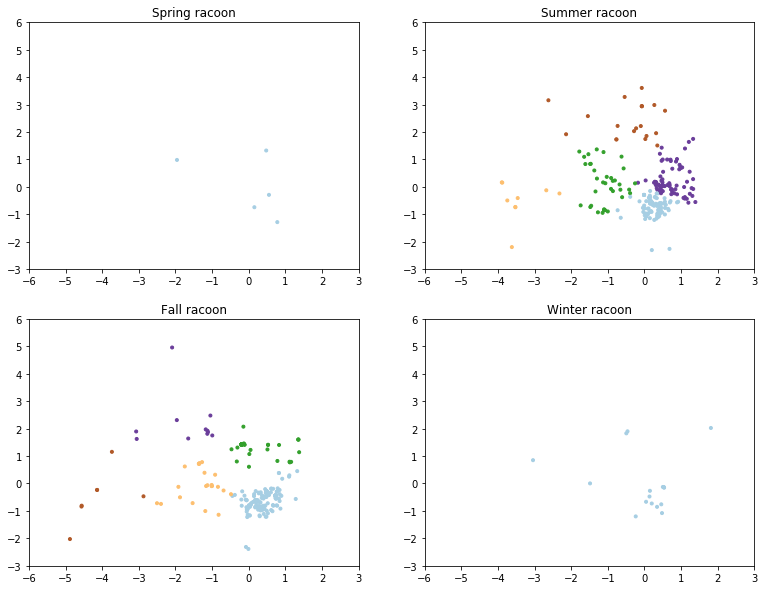

In [98]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(r_spring_scaled[:,0],r_spring_scaled[:,1],c=y_pred_spring_r,cmap='Paired',marker='.')
axs[0,0].set_title('Spring racoon')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=y_pred_summer_r,cmap='Paired',marker='.')
axs[0,1].set_title('Summer racoon')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=y_pred_fall_r,cmap='Paired',marker='.')
axs[1,0].set_title('Fall racoon')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=y_pred_winter_r,cmap='Paired',marker='.')
axs[1,1].set_title('Winter racoon')

In [91]:
kmeans_summer_cbr = KMeans(n_clusters=5)
kmeans_summer_cbr.fit(cbr_summer_scaled)
kmeans_fall_cbr = KMeans(n_clusters=5)
kmeans_fall_cbr.fit(cbr_fall_scaled)
kmeans_winter_cbr = KMeans(n_clusters=2)
kmeans_winter_cbr.fit(cbr_fall_scaled)
kmeans_spring_cbr = KMeans(n_clusters=3)
kmeans_spring_cbr.fit(cbr_spring_scaled)

KMeans(n_clusters=3)

In [92]:
#cbr
cbr_summer_labels = kmeans_summer_cbr.labels_
realClusterNum_summer_cbr = len(set(cbr_summer_labels))-(1 if -1 in cbr_summer_labels else 0)
clusterNum_summer_cbr = len(set(cbr_summer_labels))
print("realclusterNum_summer_cbr",realClusterNum_summer_cbr)
print("clusterNum_summer_cbr",clusterNum_summer_cbr)

cbr_fall_labels = kmeans_fall_cbr.labels_
realClusterNum_fall_cbr = len(set(cbr_fall_labels))-(1 if -1 in cbr_fall_labels else 0)
clusterNum_fall_cbr = len(set(cbr_fall_labels))
print("realclusterNum_fall_cbr",realClusterNum_fall_cbr)
print("clusterNum_fall_cbr",clusterNum_fall_cbr)

cbr_winter_labels = kmeans_winter_cbr.labels_
realClusterNum_winter_cbr = len(set(cbr_winter_labels))-(1 if -1 in cbr_winter_labels else 0)
clusterNum_winter_cbr = len(set(cbr_winter_labels))
print("realclusterNum_winter_cbr",realClusterNum_winter_cbr)
print("clusterNum_winter_cbr",clusterNum_winter_cbr)

cbr_spring_labels = kmeans_spring_cbr.labels_
realClusterNum_spring_cbr = len(set(cbr_spring_labels))-(1 if -1 in cbr_spring_labels else 0)
clusterNum_spring_cbr = len(set(cbr_spring_labels))
print("realclusterNum_spring_cbr",realClusterNum_spring_cbr)
print("clusterNum_spring_cbr",clusterNum_spring_cbr)

realclusterNum_summer_cbr 5
clusterNum_summer_cbr 5
realclusterNum_fall_cbr 5
clusterNum_fall_cbr 5
realclusterNum_winter_cbr 2
clusterNum_winter_cbr 2
realclusterNum_spring_cbr 3
clusterNum_spring_cbr 3


In [93]:
y_pred_summer_cbr = kmeans_summer_cbr.fit_predict(cbr_summer_scaled)
y_pred_fall_cbr = kmeans_fall_cbr.fit_predict(cbr_fall_scaled)
y_pred_winter_cbr = kmeans_winter_cbr.fit_predict(cbr_winter_scaled)
y_pred_spring_cbr = kmeans_spring_cbr.fit_predict(cbr_spring_scaled)

Text(0.5, 1.0, 'Winter coyote, bear, and racoon')

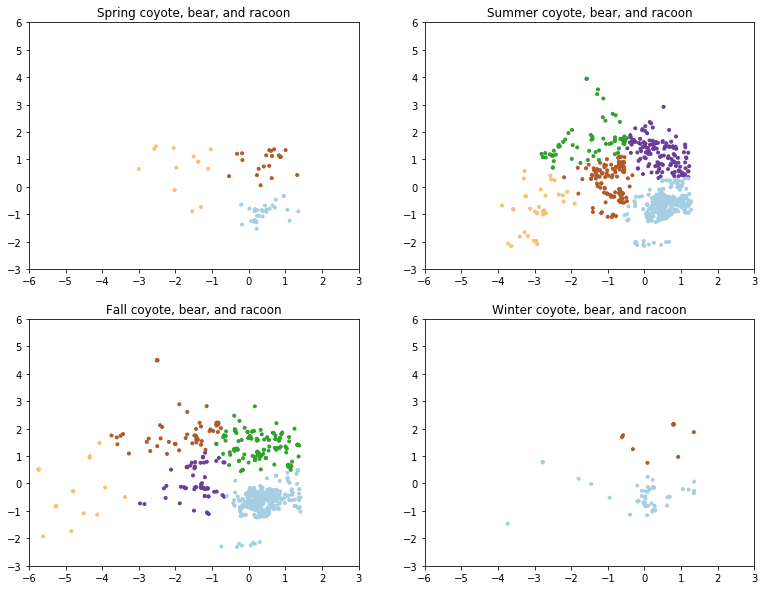

In [94]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=y_pred_spring_cbr,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote, bear, and racoon')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=y_pred_summer_cbr,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote, bear, and racoon')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=y_pred_fall_cbr,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote, bear, and racoon')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=y_pred_winter_cbr,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote, bear, and racoon')